### *Импорт библиотек для работы с дата-сетом* 

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
df = pd.read_csv('water_potability.csv')

In [201]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [202]:
#некоторые общие рекомендации по диапазонам для каждого из столбцов:
#pH: Обычно варьируется от 6.5 до 8.5 для питьевой воды.
#Solids: Зависит от источника, но значения выше 1000 мг/л могут указывать на загрязнение.
#Chloramines: Обычно не должно превышать 4 мг/л.
#Sulfate: Рекомендуется не более 250 мг/л для питьевой воды.
#Conductivity: Обычно до 1000 мкСм/см для питьевой воды.
#Organic_carbon: Обычно не более 2-5 мг/л, хотя это может варьироваться.
#Trihalomethanes: Рекомендуется не более 80 мкг/л.
#Turbidity: Обычно не более 1 НТУ для питьевой воды.
#Potability: Бинарный признак (0 или 1).

In [203]:
df.info()
#Столбец ph имеет 491 пропущенное значение.
#Столбец Sulfate имеет 781 пропущенное значение.
#Столбец Trihalomethanes имеет 162 пропущенных значения.
#Остальные столбцы не имеют пропусков.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [204]:
df.shape
#Количество строк: 3276
#Количество столбцов: 10
#Типы данных:
#float64: используются для большинства признаков (9 столбцов).
#int64: используется для целевой переменной Potability (1 столбец)

(3276, 10)

In [205]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [206]:
#pH (уровень pH):
#Среднее значение составляет 7,08, что указывает на нейтральную среду.
#Минимальное значение 0,00 и максимальное значение 14,00 указывают на возможные ошибки в данных или экстремальные условия.
#Hardness (плотность):
#Средняя жесткость составляет 196,37 мг/л, с диапазоном от 47,43 до 323,12 мг/л.
#Стандартное отклонение (32,88) говорит о том, что значения варьируются в пределах нормы.
#Solids (общие растворенные вещества):
#Среднее значение составляет 22014,09 мг/л, с максимальным значением 61227,20 мг/л.
#Высокое стандартное отклонение (8768,57) указывает на значительные колебания в содержании растворенных веществ.
#Chloramines (хлорамины):
#Среднее значение составляет 7,12 мг/л, с диапазоном от 0,35 до13,13 мг/л.
#Уровни хлораминов находятся в пределах безопасных значений для питьевой воды.
#Sulfate (сульфаты):
#Среднее значение составляет 333,78 мг/л, с минимальным и максимальным значениями от 129 до481 мг/л.
#Стандартное отклонение (41,42) показывает умеренные колебания.
#Conductivity (электропроводность):
#Средняя электропроводность составляет 426,21 мкСм/см, с диапазоном от 181,48 до753,34 мкСм/см.
#Высокая проводимость может указывать на наличие большого количества растворенных солей.
#Organic_carbon (органический углерод):
#Среднее значение составляет 14,28 мг/л, что является нормальным уровнем.
#Диапазон от 2,20 до28,30 мг/л показывает разнообразие в содержании органических веществ.
#Trihalomethanes (трихалометаны):
#Среднее значение составляет 66,40 мкг/л, с диапазоном от 0,74 до124 мкг/л.
#Важно следить за уровнями тригалометанов из-за их потенциальной канцерогенности.
#Turbidity (мутность):
#Средняя мутность составляет 3,97 НТУ, с диапазоном от 1,45 до6,74 НТУ.
#Более высокие значения мутности могут указывать на загрязнение воды.
#Potability (пригодность для питья):
#Среднее значение составляет около 0,39, что указывает на то, что примерно треть данных соответствует питьевой воде.
#Значения варьируются между 0 и 1, где 1 означает пригодность для питья.

# Описание набора данных "Качество воды и пригодность для питья"

- **ph (pH)**: 
  - Уровень pH воды, который показывает её кислотность или щелочность. Значения варьируются от 0 до 14, где 7 считается нейтральным. Более низкие значения указывают на кислую среду, а более высокие — на щелочную.

- **Hardness (Жесткость)**: 
  - Показатель жесткости воды, который определяется содержанием кальция и магния. Измеряется в мг/л. Более высокие значения могут указывать на более жесткую воду.

- **Solids (Общие растворенные вещества)**: 
  - Общее количество растворенных веществ в воде, измеряемое в мг/л. Высокие значения могут указывать на загрязнение воды.

- **Chloramines (Хлорамины)**: 
  - Уровень хлораминов в воде, который используется как дезинфицирующее средство. Измеряется в мг/л. Высокие уровни могут быть вредными для здоровья.

- **Sulfate (Сульфаты)**: 
  - Концентрация сульфатов в воде, измеряемая в мг/л. Сульфаты могут влиять на вкус воды и её качество.

- **Conductivity (Электропроводность)**: 
  - Показатель электропроводности воды, измеряемый в мкСм/см. Высокая проводимость может свидетельствовать о наличии большого количества растворенных веществ.

- **Organic_carbon (Органический углерод)**: 
  - Концентрация органического углерода в воде, измеряемая в мг/л. Высокие уровни могут указывать на загрязнение органическими веществами.

- **Trihalomethanes (Трихалометаны)**: 
  - Уровень тригалометанов в воде, которые образуются при хлорировании и могут быть канцерогенными. Измеряется в мкг/л.

- **Turbidity (Мутность)**: 
  - Показатель мутности воды, который отражает наличие взвешенных частиц. Измеряется в НТУ (непосредственных единицах мутности). Высокие значения указывают на плохое качество воды.

- **Potability (Пригодность для питья)**: 
  - Целевая переменная, которая указывает на то, пригодна ли вода для питья (1) или нет (0). Это бинарный признак, который является основным объектом анализа.

# Проверки

In [209]:
df.duplicated().sum() 

0

In [210]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [211]:
#Общее количество пропущенных значений:
#ph: 491
#Sulfate: 781
#Trihalomethanes: 162
#Остальные столбцы не имеют пропусков.

In [212]:
df.duplicated().sum()
#в наборе данных нет полностью идентичных строк, что является хорошим знаком.

0

In [213]:
df['ph'].value_counts()

ph
3.716080    1
6.704432    1
5.915807    1
8.136498    1
6.493764    1
           ..
7.808012    1
5.895949    1
7.269652    1
9.489601    1
7.874671    1
Name: count, Length: 2785, dtype: int64

In [214]:
df['Hardness'].value_counts()

Hardness
204.890455    1
134.560276    1
170.190912    1
237.461099    1
171.238926    1
             ..
218.237186    1
208.374188    1
142.145566    1
179.799917    1
195.102299    1
Name: count, Length: 3276, dtype: int64

In [215]:
df['Solids'].value_counts()

Solids
20791.318981    1
15979.334793    1
37000.955674    1
18736.190902    1
12289.900922    1
               ..
22824.699465    1
21809.709834    1
45141.686036    1
17037.725367    1
17404.177061    1
Name: count, Length: 3276, dtype: int64

In [216]:
df['Chloramines'].value_counts()

Chloramines
7.300212     1
9.504361     1
6.217223     1
5.599870     1
10.786500    1
            ..
8.696479     1
5.846112     1
6.030640     1
6.378364     1
7.509306     1
Name: count, Length: 3276, dtype: int64

In [217]:
df['Sulfate'].value_counts()

Sulfate
368.516441    1
301.230848    1
391.918229    1
330.905370    1
402.313427    1
             ..
359.710517    1
389.219586    1
337.231469    1
396.091917    1
359.948574    1
Name: count, Length: 2495, dtype: int64

In [218]:
df['Conductivity'].value_counts()

Conductivity
564.308654    1
418.642063    1
517.576762    1
235.042283    1
501.559725    1
             ..
521.016261    1
264.508083    1
369.280429    1
590.060546    1
327.459760    1
Name: count, Length: 3276, dtype: int64

In [219]:
df['Organic_carbon'].value_counts()

Organic_carbon
10.379783    1
12.897635    1
15.871770    1
11.545477    1
12.284334    1
            ..
15.310631    1
11.235144    1
20.605552    1
12.092499    1
16.140368    1
Name: count, Length: 3276, dtype: int64

In [220]:
df['Trihalomethanes'].value_counts()

Trihalomethanes
86.990970    1
84.798956    1
54.473935    1
77.730814    1
90.394895    1
            ..
73.723070    1
46.682597    1
70.168389    1
81.592362    1
78.698446    1
Name: count, Length: 3114, dtype: int64

In [221]:
df['Turbidity'].value_counts()

Turbidity
2.963135    1
3.987012    1
4.066229    1
3.759326    1
4.876273    1
           ..
3.741143    1
4.592959    1
4.604725    1
4.165550    1
2.309149    1
Name: count, Length: 3276, dtype: int64

In [222]:
df['Potability'].value_counts()
#Значение 0 (непригодно для питья) встречается 1998 раз, а значение 1 (пригодно для питья) — 1278 раз.
#Наблюдается некоторый дисбаланс классов, но это не критично.
# Определяем количество записей для класса 1
num_class_1 = df['Potability'].value_counts()[1]

# Случайно выбираем записи с меткой 0
df_class_0 = df[df['Potability'] == 0].sample(n=num_class_1, random_state=42)

# Получаем все записи с меткой 1
df_class_1 = df[df['Potability'] == 1]

# Объединяем отобранные записи с меткой 0 и все записи с меткой 1
df = pd.concat([df_class_0, df_class_1])

# Перемешиваем строки в датафрейме
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Проверяем новый баланс классов
print("\nНовый баланс классов:")
print(df['Potability'].value_counts())


Новый баланс классов:
Potability
0    1278
1    1278
Name: count, dtype: int64


In [223]:
num_new_records = 1000  # Например, создадим 1000 новых записей

# Генерация новых записей для класса 0 (непригодная вода)
new_data_0 = {
    'ph': np.random.uniform(low=5.0, high=7.0, size=num_new_records),  # pH ниже нормального
    'Hardness': np.random.uniform(low=50, high=150, size=num_new_records),
    'Solids': np.random.uniform(low=10000, high=30000, size=num_new_records),
    'Chloramines': np.random.uniform(low=4.0, high=10.0, size=num_new_records),
    'Sulfate': np.random.uniform(low=200, high=300, size=num_new_records),
    'Conductivity': np.random.uniform(low=500, high=800, size=num_new_records),
    'Organic_carbon': np.random.uniform(low=5.0, high=15.0, size=num_new_records),
    'Trihalomethanes': np.random.uniform(low=80, high=120, size=num_new_records),
    'Turbidity': np.random.uniform(low=5.0, high=10.0, size=num_new_records),
    'Potability': 0
}

# Генерация новых записей для класса 1 (пригодная вода)
new_data_1 = {
    'ph': np.random.uniform(low=6.5, high=8.5, size=num_new_records),  # pH в нормальном диапазоне
    'Hardness': np.random.uniform(low=150, high=300, size=num_new_records),
    'Solids': np.random.uniform(low=5000, high=15000, size=num_new_records),
    'Chloramines': np.random.uniform(low=0.0, high=4.0, size=num_new_records),
    'Sulfate': np.random.uniform(low=100, high=200, size=num_new_records),
    'Conductivity': np.random.uniform(low=200, high=500, size=num_new_records),
    'Organic_carbon': np.random.uniform(low=2.0, high=5.0, size=num_new_records),
    'Trihalomethanes': np.random.uniform(low=20, high=60, size=num_new_records),
    'Turbidity': np.random.uniform(low=1.0, high=3.0, size=num_new_records),
    'Potability': 1
}

# Создание DataFrame из новых данных
df_class_0 = pd.DataFrame(new_data_0)
df_class_1 = pd.DataFrame(new_data_1)

# Объединение новых данных с существующим DataFrame
df = pd.concat([df, df_class_0, df_class_1], ignore_index=True)

# *Проверим датафрейм на наличие пропущенных значений с помощью команды*

In [225]:
unique_counts = {col: df[col].nunique() for col in df.columns}
print(unique_counts)
#Каждый столбец имеет уникальные значения:
#ph: 2785 уникальных значений
#Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Turbidity: все имеют 3276 уникальных значений.
#Sulfate: 2495 уникальных значений, что указывает на наличие пропусков.
#Trihalomethanes: 3114 уникальных значений.
#Целевая переменная Potability имеет 2 уникальных значения (0 и 1), что соответствует бинарной классификации.

{'ph': 4184, 'Hardness': 4556, 'Solids': 4556, 'Chloramines': 4556, 'Sulfate': 3947, 'Conductivity': 4556, 'Organic_carbon': 4556, 'Trihalomethanes': 4427, 'Turbidity': 4556, 'Potability': 2}


# Обработка пропусков в данных

In [227]:
# Заполнение пропусков средним значением
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

# Проверка на наличие пропусков после обработки
print(df.isna().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


C:\Users\aniwe\AppData\Local\Temp\ipykernel_18964\2700232233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].mean(), inplace=True)
C:\Users\aniwe\AppData\Local\Temp\ipykernel_18964\2700232233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

# Находятся ли значения в указанных диапазонах

In [229]:
# Обработка Conductivity
df.loc[df['Conductivity'] < 0, 'Conductivity'] = df['Conductivity'].median()  # Заменяем отрицательные значения
df.loc[df['Conductivity'] > 1000, 'Conductivity'] = df['Conductivity'].median()  # Заменяем высокие значения
# Проверка на наличие пропусков после обработки (если необходимо)
print(df.isna().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [230]:
# Определение пределов
limits = {
    'ph': (6.5, 8.5),
    'Hardness': (0, 500),
    'Solids': (0, 1000), 
    'Chloramines': (0, 4),
    'Sulfate': (0, 250),
    'Conductivity': (0, 1000),
    'Organic_carbon': (0, 5),
    'Trihalomethanes': (0, 80),
    'Turbidity': (0, 1),
}

# Проверка значений
for column, (lower_limit, upper_limit) in limits.items():
    out_of_bounds = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    if not out_of_bounds.empty:
        print(f"Значения вне пределов нормы для {column}:")
        print(out_of_bounds)

Значения вне пределов нормы для ph:
            ph    Hardness        Solids  Chloramines     Sulfate  \
2     6.433722  177.252511  20321.229404     6.378918  373.051772   
4     8.928142  197.648530  27884.434252     8.968576  265.925499   
7     5.898726  198.310020  21148.241905     9.124900  326.254282   
11    4.487517  199.051403  36860.468899     9.751561  338.049428   
12    6.193170  225.683422  12883.726496     4.739360  265.925499   
...        ...         ...           ...          ...         ...   
3550  5.658308   95.087453  17616.653779     7.606435  274.607229   
3551  5.895924  137.728215  14715.757744     5.224071  203.669274   
3553  6.182943   81.551795  18662.723721     8.589912  207.783687   
3554  6.001902   77.352634  13897.896730     5.219196  202.878258   
3555  5.271879  111.989636  25468.677719     6.440570  200.229397   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2       375.028222       11.684648        61.629823   3.64

In [231]:
#Построим гистограммы распределения каждого признака (столбца данных)

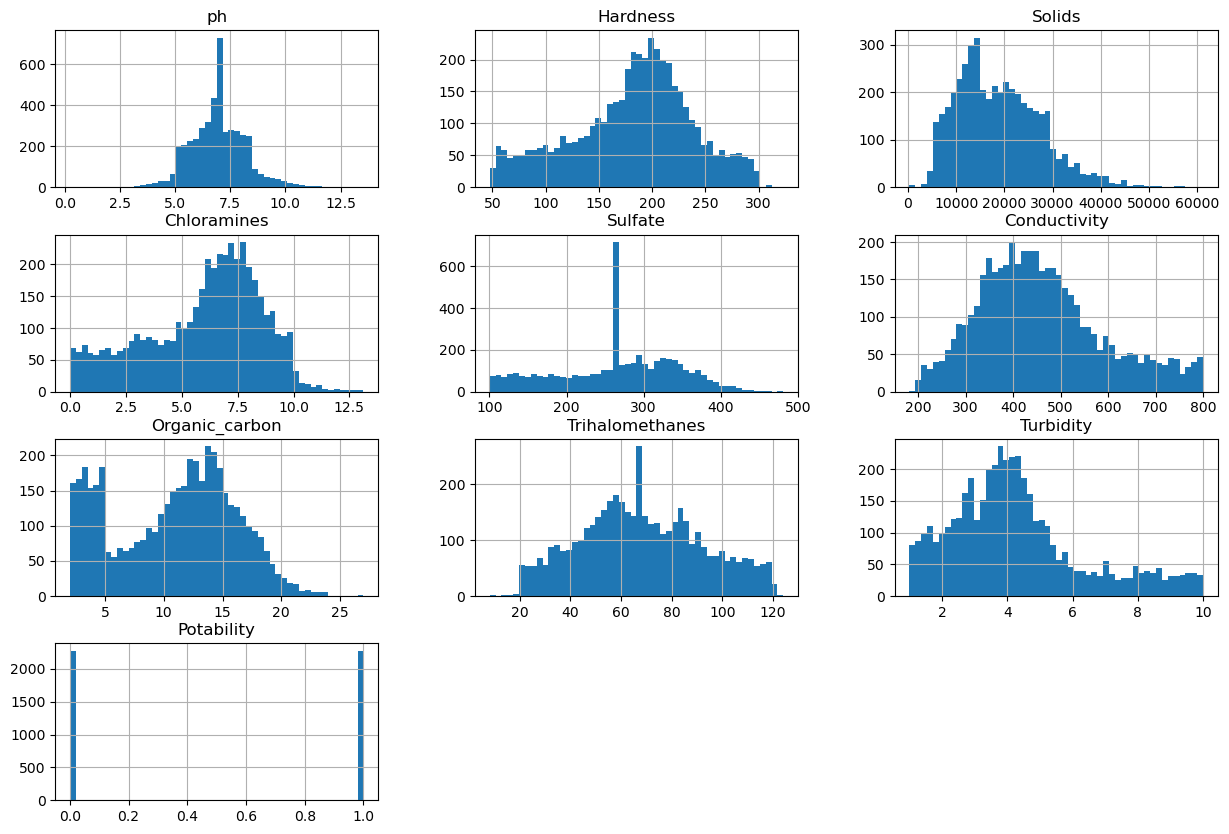

In [232]:
df.hist(figsize = (15,10), bins = 50);

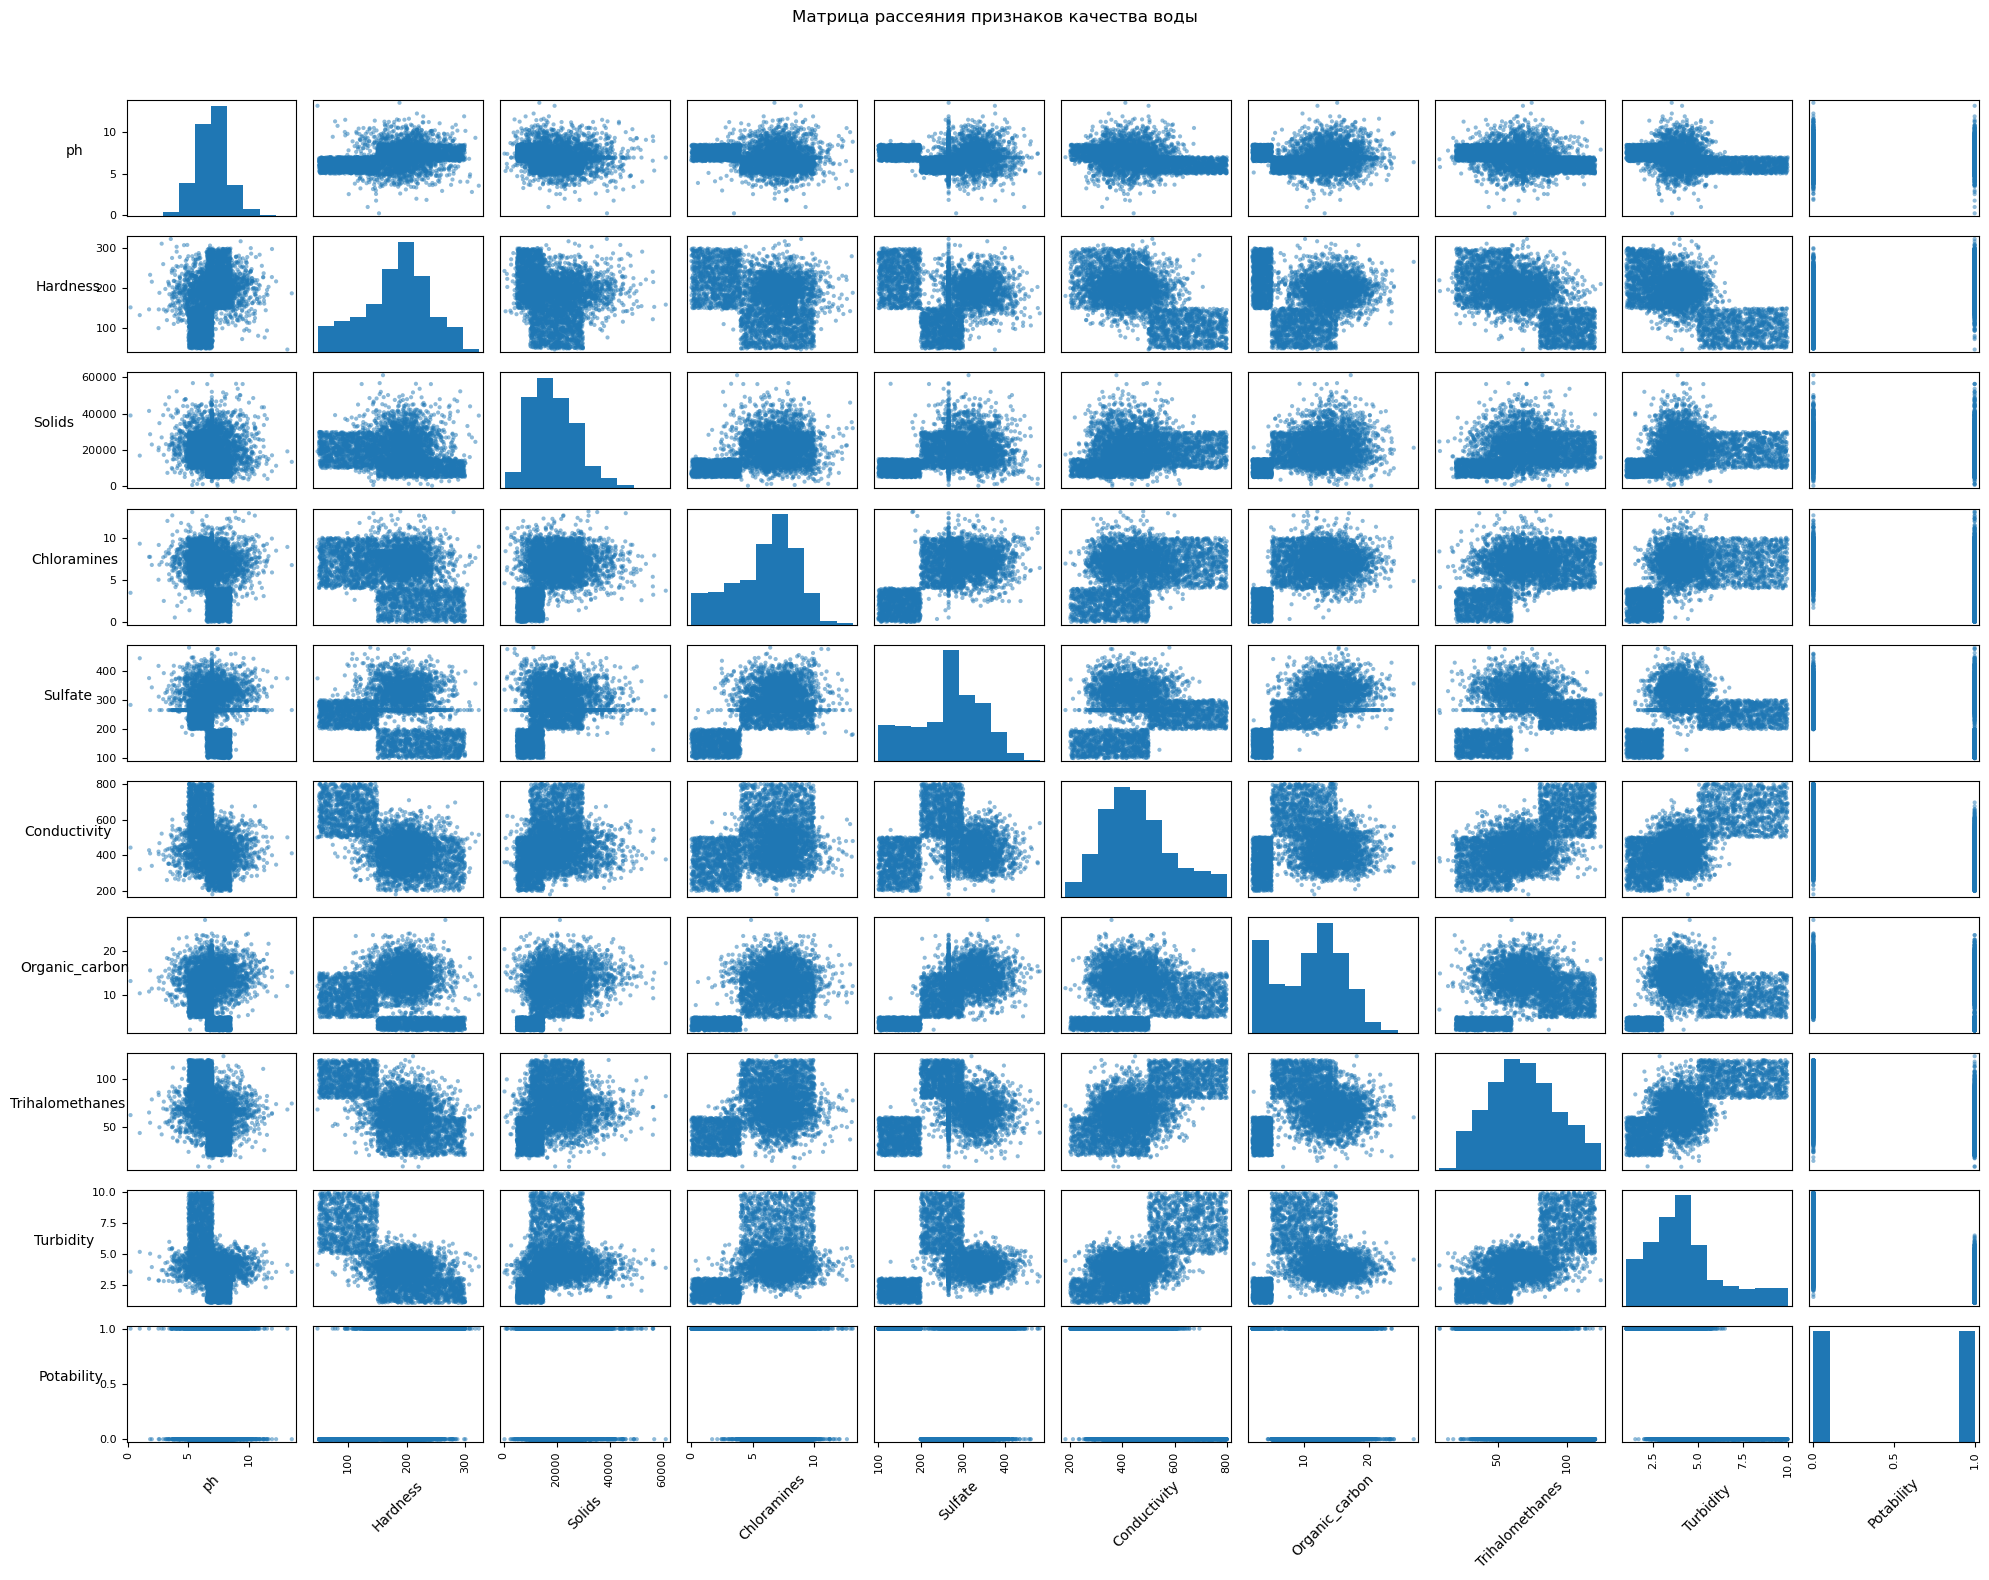

In [233]:
from pandas.plotting import scatter_matrix
columns_to_plot = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", 
                   "Conductivity", "Organic_carbon", "Trihalomethanes", 
                   "Turbidity", "Potability"]

# Построение матрицы рассеяния
scatter_matrix(df[columns_to_plot], figsize=(20, 15), alpha=0.5)

# Поворот меток осей
for ax in plt.gcf().axes:
    ax.xaxis.label.set_rotation(45)  # Вертикальные метки для X
    ax.yaxis.label.set_rotation(0)    # Горизонтальные метки для Y
    ax.yaxis.labelpad = 20             # Увеличение расстояния между меткой и осью

# Использование tight_layout для предотвращения наложения
plt.tight_layout()

# Показать заголовок выше графиков
plt.suptitle("Матрица рассеяния признаков качества воды", y=1.05)  # y=1.05 поднимает заголовок выше

# Показать график
plt.show()

Матрица рассеяния (scatter matrix) для нашего набора данных о качестве воды 
и пригодности для питья является мощным инструментом визуализации,
который позволяет выявить взаимосвязи между различными признаками. Взаимосвязи между признаками:

Корреляция: Матрица рассеяния помогает визуально определить, есть ли линейные или нелинейные зависимости между признаками.
Например, если точки на графике сгруппированы в виде прямой линии, это может указывать на сильную корреляцию между двумя переменными
Выявление выбросов

Аномальные значения: Графики могут помочь выявить выбросы (аномальные значения), 
которые значительно отличаются от остальных данных. Это важно для последующей обработки данных и построения модели.                                    аспределение значений

Диагональные графики: На диагонали матрицы обычно отображаются гистограммы или оценки плотности для каждого признака, что позволяет увидеть распределение значений и оценить их нормальность.
Влияние на целевую переменную

Анализ целевой переменной (Potability):  моное использовать матрицу рассеяния, чтобы увидеть, как различные признаки влияют на целевую переменную (пригодность для питья). Например,можное заметить, что высокие уровни мутности или хлораминов связаны с низкой вероятностью пригодности воды для питья. 

C:\Users\aniwe\AppData\Local\Temp\ipykernel_18964\1542138431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='viridis')


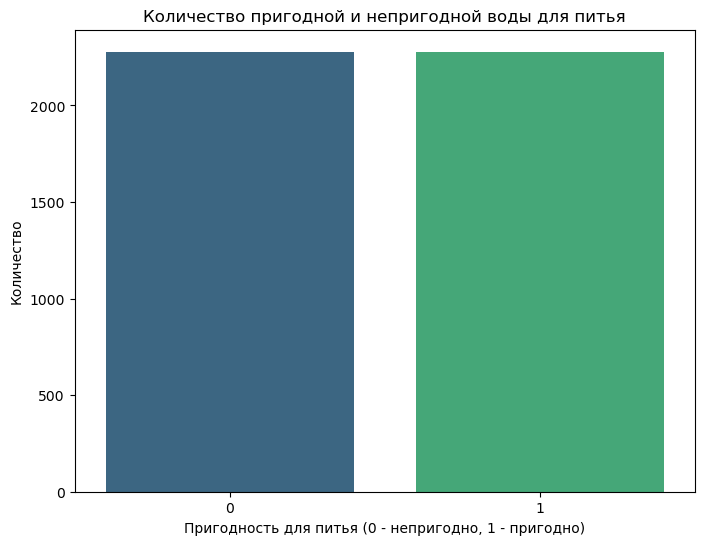

In [235]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=df, palette='viridis')

# Добавление заголовка и меток осей
plt.title('Количество пригодной и непригодной воды для питья')
plt.xlabel('Пригодность для питья (0 - непригодно, 1 - пригодно)')
plt.ylabel('Количество')

# Показать график
plt.show()


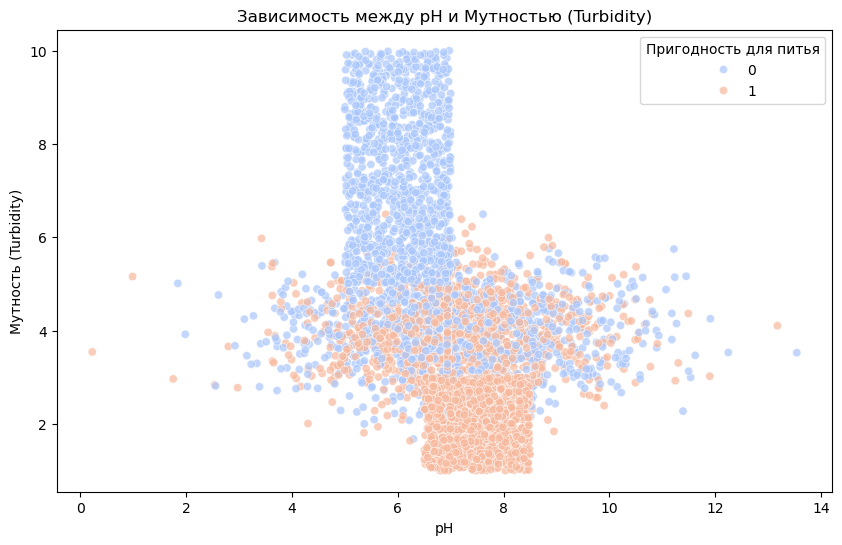

In [236]:
#График зависимости между pH и Turbidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ph'], y=df['Turbidity'], hue='Potability', data=df, palette='coolwarm', alpha=0.7)
plt.title('Зависимость между pH и Мутностью (Turbidity)')
plt.xlabel('pH')
plt.ylabel('Мутность (Turbidity)')
plt.legend(title='Пригодность для питья', loc='upper right')
plt.show()

Что показывает: Этот график показывает, как значения pH соотносятся с мутностью воды.
Цветовая кодировка (hue) указывает на пригодность воды для питья (0 или 1).
Интерпретация:
Можно увидеть, как мутность изменяется в зависимости от pH. 
Например, если мутность увеличивается при низких значениях pH,
это может указывать на проблемы с качеством воды.

C:\Users\aniwe\AppData\Local\Temp\ipykernel_18964\1061663831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Potability'], y=df['Chloramines'], data=df, palette='Set2')


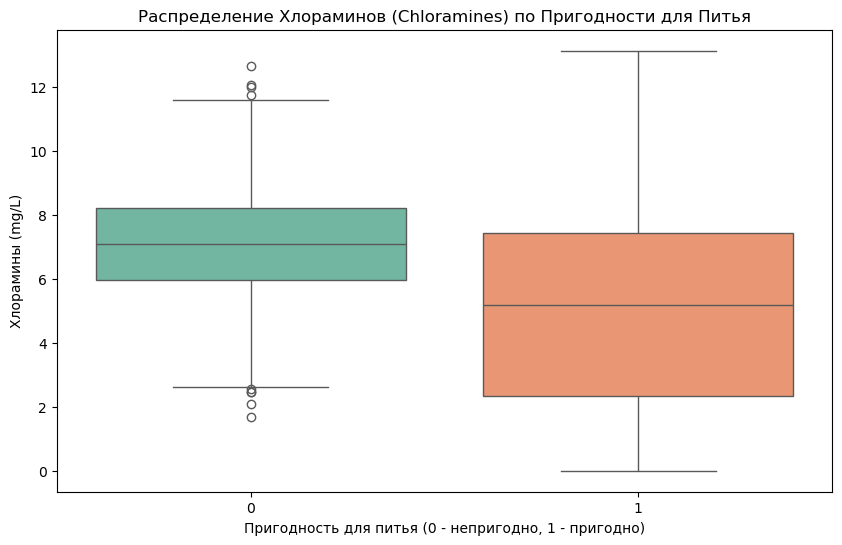

In [238]:
#График распределения Chloramines по Potability
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Potability'], y=df['Chloramines'], data=df, palette='Set2')
plt.title('Распределение Хлораминов (Chloramines) по Пригодности для Питья')
plt.xlabel('Пригодность для питья (0 - непригодно, 1 - пригодно)')
plt.ylabel('Хлорамины (mg/L)')
plt.show()

Коробчатая диаграмма показывает распределение уровней хлораминов в зависимости от того, пригодна ли вода для питья.
Интерпретация: 
Можно увидеть медиану и разброс значений хлораминов для каждой категории. Если значения
хлораминов значительно выше в категории непригодной воды, 
это может указывать на то, что высокие уровни хлораминов связаны с низкой пригодностью.

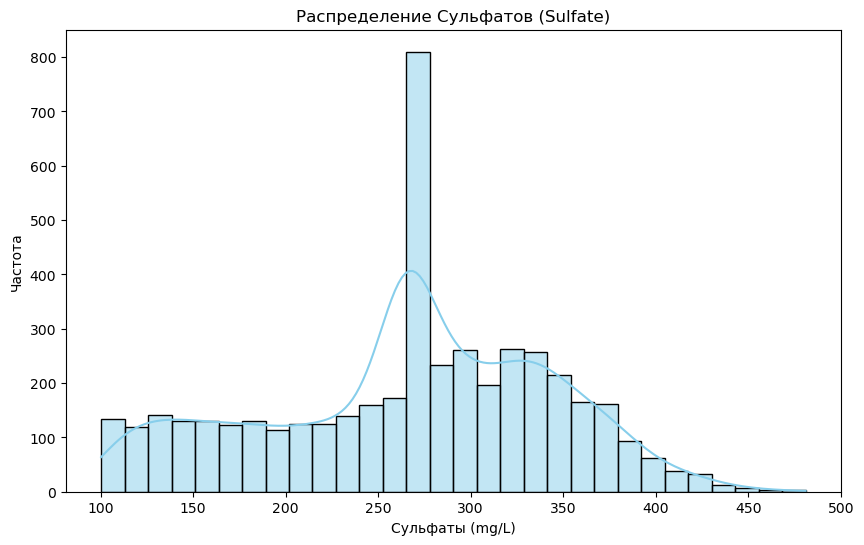

In [240]:
#Гистограмма для Sulfate
plt.figure(figsize=(10, 6))
sns.histplot(df['Sulfate'], bins=30, kde=True, color='skyblue')
plt.title('Распределение Сульфатов (Sulfate)')
plt.xlabel('Сульфаты (mg/L)')
plt.ylabel('Частота')
plt.show()

Что показывает: 
Гистограмма показывает распределение значений сульфатов в вашем наборе данных.
Интерпретация:
Можно увидеть, как часто встречаются различные уровни сульфатов. Наличие пиков может указывать на предпочтительные уровни сульфатов в воде.

In [242]:
#Корреляционная матрица

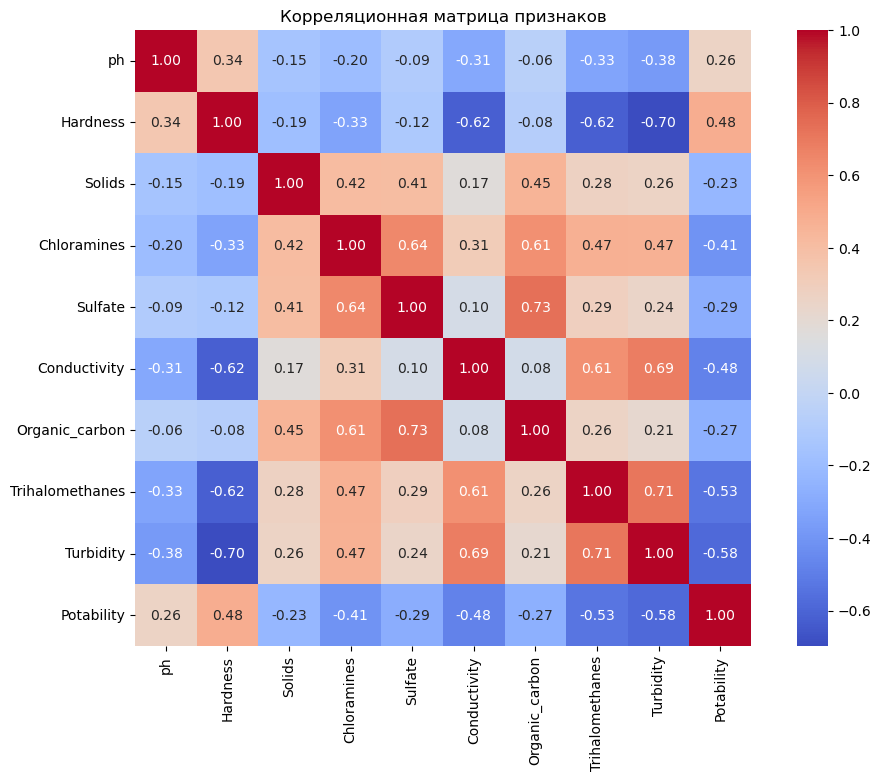

In [243]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляционная матрица признаков")
plt.show()

Что показывает: Тепловая карта отображает корреляцию между всеми числовыми признаками в наборе данных.
Интерпретация: Значения ближе к 1 или -1 указывают на сильную корреляцию между признаками. Например, если Chloramines и
Potability имеют высокую отрицательную корреляцию, это может означать,
что более высокие уровни хлораминов связаны с меньшей вероятностью пригодности.

### Формирование дата-сета для обучения моделей

In [246]:

# список имён признаков, которые будут использоваться для построения модели
features_names = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", 
                   "Conductivity", "Organic_carbon", "Trihalomethanes", 
                   "Turbidity"]

In [247]:
X = df[features_names]

In [248]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.939417,182.100573,17423.407989,6.815719,265.925499,495.513128,11.558372,85.864119,3.568197
1,6.939417,164.909072,32768.227966,6.309685,285.560983,527.198675,15.843303,59.728173,3.499453
2,6.433722,177.252511,20321.229404,6.378918,373.051772,375.028222,11.684648,61.629823,3.641490
3,6.753128,191.982995,18222.931957,3.920974,296.196618,389.742462,9.689144,92.219615,5.102517
4,8.928142,197.648530,27884.434252,8.968576,265.925499,317.532680,21.497866,73.011132,4.111102
...,...,...,...,...,...,...,...,...,...
4551,7.539797,161.968409,10649.831343,0.037600,175.951178,457.640752,4.829563,49.886696,2.269390
4552,6.643748,190.995098,7339.774770,1.927074,100.502825,415.518695,4.893410,46.199453,2.366223
4553,6.798755,150.948018,6136.033075,1.955041,153.870402,306.039956,3.228016,41.628314,2.310361
4554,7.540654,205.271357,9409.362562,2.284002,165.677083,291.886584,3.634083,39.554055,2.709649


In [249]:
y = df["Potability"]

In [250]:
print(df[features_names].describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  4556.000000  4556.000000   4556.000000  4556.000000  4556.000000   
mean      6.939417   181.569286  18929.170399     5.981128   265.925499   
std       1.261368    57.091577   8773.548258     2.609296    78.133683   
min       0.227499    47.432000    320.942611     0.005142   100.287772   
25%       6.150374   146.774272  12208.923877     4.217382   214.055367   
50%       6.939417   188.686983  17808.080305     6.519249   265.925499   
75%       7.711445   219.012989  24682.524301     7.871278   324.547575   
max      13.541240   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   4556.000000     4556.000000      4556.000000  4556.000000  
mean     459.795267       10.881928        68.165934     4.301262  
std      132.324442        5.134639        24.260262     2.061024  
min      181.483754        2.001276         8.175876

### Обучение моделей (models fitting)

In [252]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from imblearn.over_sampling import SMOTE

In [253]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3052, 9) (1504, 9) (3052,) (1504,)


In [254]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [255]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Метод k-ближайших соседей

In [257]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Прогнозирование (prediction)

In [259]:
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(knn_predict, y_test)
knn_accuracy

In [377]:
confusion_matrix(knn_predict, y_test)

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       747
           1       0.70      0.71      0.70       757

    accuracy                           0.70      1504
   macro avg       0.70      0.70      0.70      1504
weighted avg       0.70      0.70      0.70      1504



In [379]:
print(classification_report(knn_predict, y_test))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       747
           1       0.70      0.71      0.70       757

    accuracy                           0.70      1504
   macro avg       0.70      0.70      0.70      1504
weighted avg       0.70      0.70      0.70      1504



In [381]:
knn_classification_rep = classification_report(y_test, knn_predict, output_dict=True)

# Сохранение результатов в переменную log
log = {
    'KNN': {
        'accuracy': knn_accuracy,
        'precision': knn_classification_rep['weighted avg']['precision'],
        'recall': knn_classification_rep['weighted avg']['recall'],
        'f1-score': knn_classification_rep['weighted avg']['f1-score'],
        'support': knn_classification_rep['weighted avg']['support']
    }
}

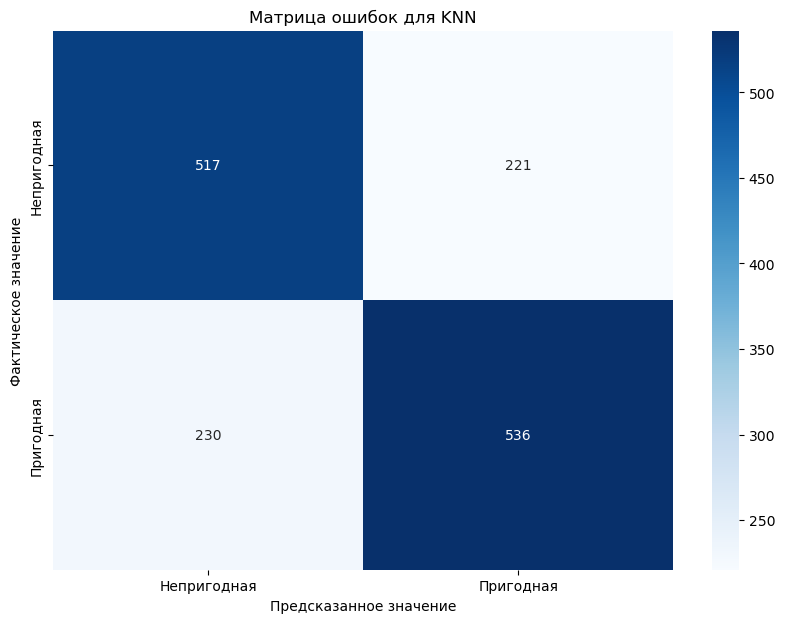

In [397]:
# Визуализация матрицы ошибок для KNN
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Непригодная', 'Пригодная'], 
            yticklabels=['Непригодная', 'Пригодная'])
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.title('Матрица ошибок для KNN')
plt.show()

### Метод опорных векторов

In [264]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [265]:
svc_predict = svc.predict(X_test)

In [266]:
svc_accuracy = accuracy_score(svc_predict, y_test)
svc_accuracy

0.6628989361702128

In [267]:
confusion_matrix(svc_predict, y_test)

array([[503, 272],
       [235, 494]], dtype=int64)

In [385]:
print(classification_report(svc_predict, y_test))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       775
           1       0.64      0.68      0.66       729

    accuracy                           0.66      1504
   macro avg       0.66      0.66      0.66      1504
weighted avg       0.66      0.66      0.66      1504



In [387]:
svc_classification_rep = classification_report(y_test, svc_predict, output_dict=True)

# Сохранение результатов в переменную log
log['SVC'] = {
    'accuracy': svc_accuracy,
    'precision': svc_classification_rep['weighted avg']['precision'],
    'recall': svc_classification_rep['weighted avg']['recall'],
    'f1-score': svc_classification_rep['weighted avg']['f1-score'],
    'support': svc_classification_rep['weighted avg']['support']
}

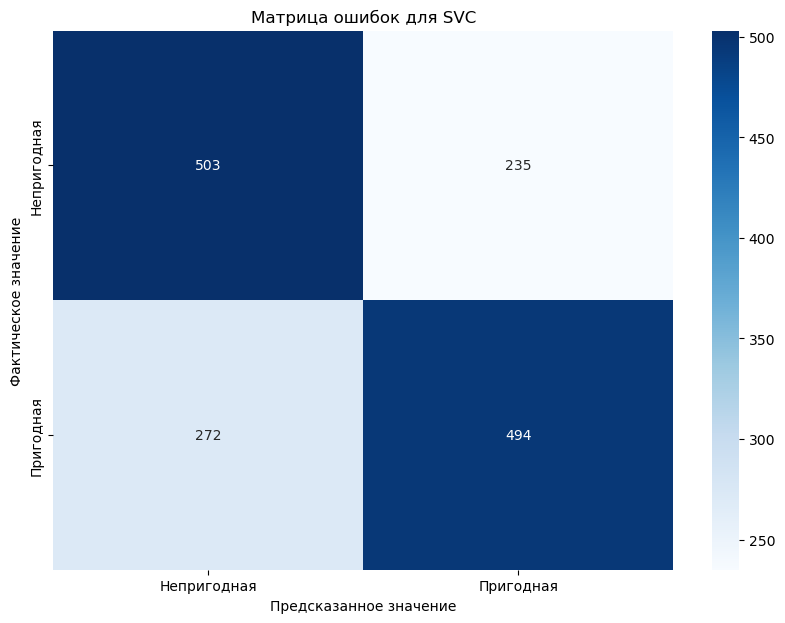

In [399]:
# Визуализация матрицы ошибок для SVC
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Непригодная', 'Пригодная'], 
            yticklabels=['Непригодная', 'Пригодная'])
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.title('Матрица ошибок для SVC')
plt.show()

### Классификатор дерева решений

In [270]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [271]:
dtc_predict = dtc.predict(X_test)

In [272]:
dtc_accuracy = accuracy_score(dtc_predict, y_test)
dtc_accuracy

0.7313829787234043

In [273]:
confusion_matrix(dtc_predict, y_test)

array([[542, 208],
       [196, 558]], dtype=int64)

In [274]:
print(classification_report(dtc_predict, y_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       750
           1       0.73      0.74      0.73       754

    accuracy                           0.73      1504
   macro avg       0.73      0.73      0.73      1504
weighted avg       0.73      0.73      0.73      1504



### RandomForestClassifier

In [276]:

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [277]:
rfc_predict = rfc.predict(X_test)

In [278]:
rfc_accuracy = accuracy_score(rfc_predict, y_test)
rfc_accuracy

0.7559840425531915

In [279]:
confusion_matrix(rfc_predict, y_test)

array([[568, 197],
       [170, 569]], dtype=int64)

In [391]:
print(classification_report(rfc_predict, y_test))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       765
           1       0.74      0.77      0.76       739

    accuracy                           0.76      1504
   macro avg       0.76      0.76      0.76      1504
weighted avg       0.76      0.76      0.76      1504



In [393]:
rfc_classification_rep = classification_report(y_test, rfc_predict, output_dict=True)

# Сохранение результатов в переменную log
log['Random Forest'] = {
    'accuracy': rfc_accuracy,
    'precision': rfc_classification_rep['weighted avg']['precision'],
    'recall': rfc_classification_rep['weighted avg']['recall'],
    'f1-score': rfc_classification_rep['weighted avg']['f1-score'],
    'support': rfc_classification_rep['weighted avg']['support']
}

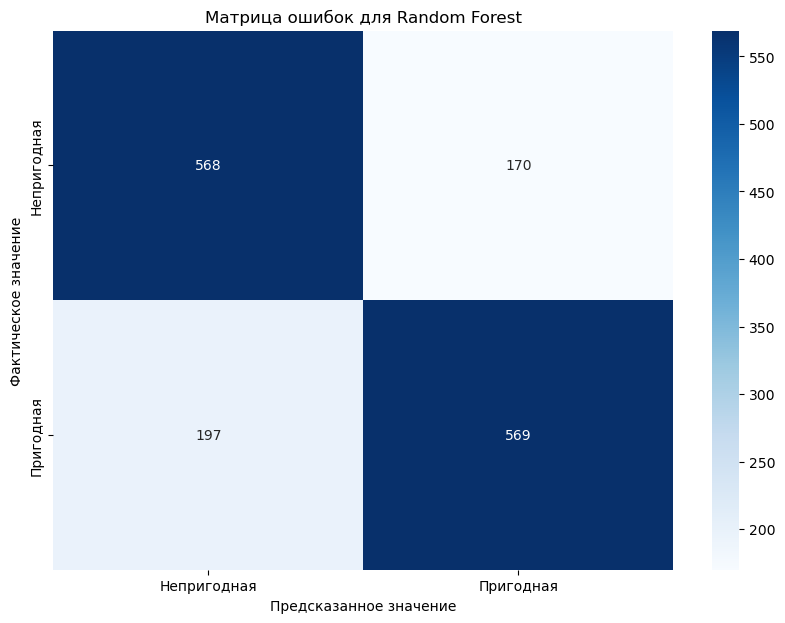

In [395]:
# Визуализация Confusion Matrix
rfc_conf_matrix = confusion_matrix(y_test, rfc_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(rfc_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Непригодная', 'Пригодная'], 
            yticklabels=['Непригодная', 'Пригодная'])
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.title('Матрица ошибок для Random Forest')
plt.show()

### Наивный байесовский классификатор

In [282]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [283]:
gnb_predict = gnb.predict(X_test)

In [284]:
gnb_accuracy = accuracy_score(gnb_predict, y_test)
gnb_accuracy

0.7087765957446809

In [285]:
confusion_matrix(gnb_predict, y_test)

array([[526, 226],
       [212, 540]], dtype=int64)

In [401]:
print(classification_report(gnb_predict, y_test)) 

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       752
           1       0.70      0.72      0.71       752

    accuracy                           0.71      1504
   macro avg       0.71      0.71      0.71      1504
weighted avg       0.71      0.71      0.71      1504



In [403]:
gnb_classification_rep = classification_report(y_test, gnb_predict, output_dict=True)

# Сохранение результатов в переменную log
log['Gaussian Naive Bayes'] = {
    'accuracy': gnb_accuracy,
    'precision': gnb_classification_rep['weighted avg']['precision'],
    'recall': gnb_classification_rep['weighted avg']['recall'],
    'f1-score': gnb_classification_rep['weighted avg']['f1-score'],
    'support': gnb_classification_rep['weighted avg']['support']
}

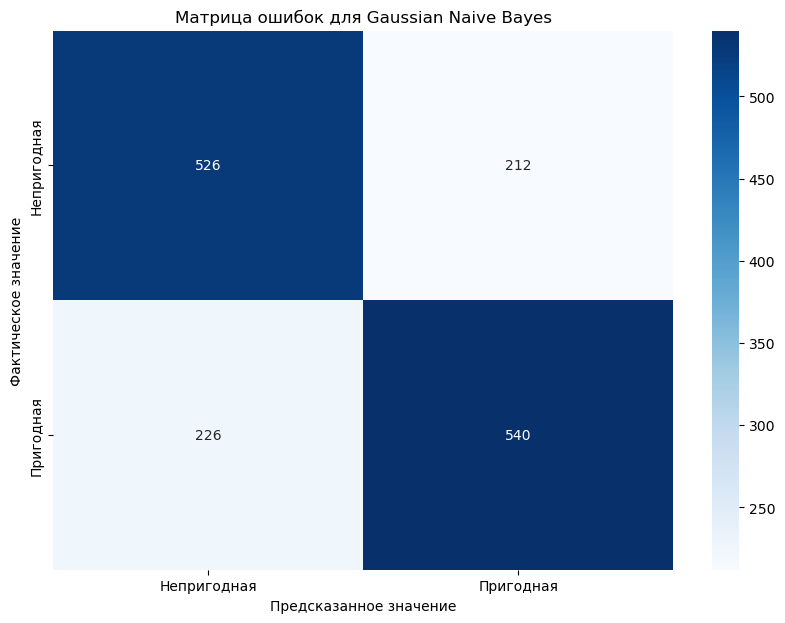

In [405]:
# Визуализация Confusion Matrix
gnb_conf_matrix = confusion_matrix(y_test, gnb_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(gnb_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Непригодная', 'Пригодная'], 
            yticklabels=['Непригодная', 'Пригодная'])
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.title('Матрица ошибок для Gaussian Naive Bayes')
plt.show()

### Логистическая регрессия

In [288]:
lrn = LogisticRegression()
lrn.fit(X_train, y_train)

C:\Users\aniwe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [289]:
lrn_predict = lrn.predict(X_test)

In [290]:
lrn_accuracy = accuracy_score(lrn_predict, y_test)
lrn_accuracy

0.7107712765957447

In [291]:
confusion_matrix(lrn_predict, y_test)

array([[534, 231],
       [204, 535]], dtype=int64)

In [407]:
print(classification_report(lrn_predict, y_test))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       765
           1       0.70      0.72      0.71       739

    accuracy                           0.71      1504
   macro avg       0.71      0.71      0.71      1504
weighted avg       0.71      0.71      0.71      1504



In [409]:
lrn_classification_rep = classification_report(y_test, lrn_predict, output_dict=True)

# Сохранение результатов в переменную log
log['Logistic Regression'] = {
    'accuracy': lrn_accuracy,
    'precision': lrn_classification_rep['weighted avg']['precision'],
    'recall': lrn_classification_rep['weighted avg']['recall'],
    'f1-score': lrn_classification_rep['weighted avg']['f1-score'],
    'support': lrn_classification_rep['weighted avg']['support']
}

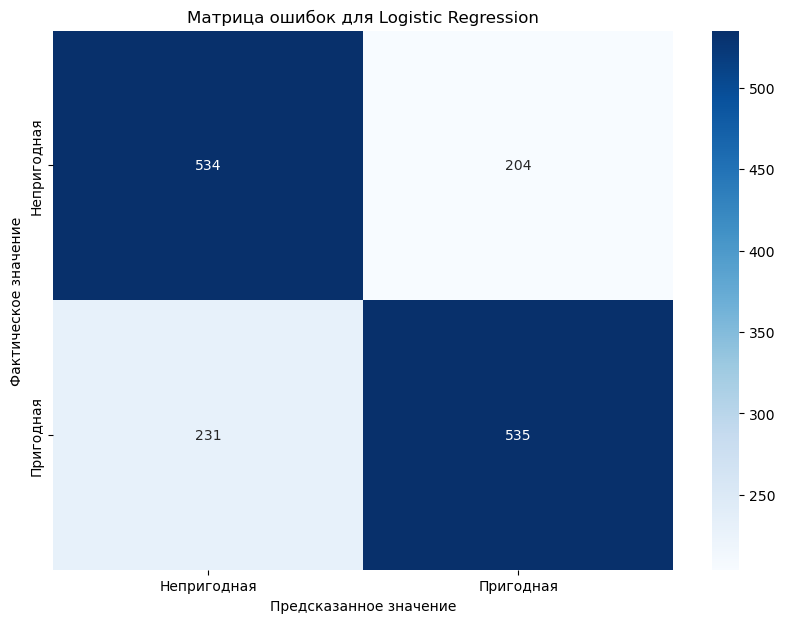

In [411]:
# Визуализация Confusion Matrix
lrn_conf_matrix = confusion_matrix(y_test, lrn_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(lrn_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Непригодная', 'Пригодная'], 
            yticklabels=['Непригодная', 'Пригодная'])
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.title('Матрица ошибок для Logistic Regression')
plt.show()

### Сравнение моделей

In [419]:
# Создаем DataFrame из логов
log_df = pd.DataFrame.from_dict(log, orient='index').reset_index()
log_df.rename(columns={'index': 'Model'}, inplace=True)

# Выводим таблицу с результатами
print("Сравнительная таблица результатов:")


Сравнительная таблица результатов:


In [417]:
log_df

,Model,accuracy,precision,recall,f1-score,support
0,KNN,0.700133,0.700228,0.700133,0.700156,1504.0
1,SVC,0.662899,0.663603,0.662899,0.662849,1504.0
2,Random Forest,0.755984,0.756477,0.755984,0.755987,1504.0
3,Gaussian Naive Bayes,0.708777,0.708950,0.708777,0.708802,1504.0
4,Logistic Regression,0.710771,0.711236,0.710771,0.710775,1504.0


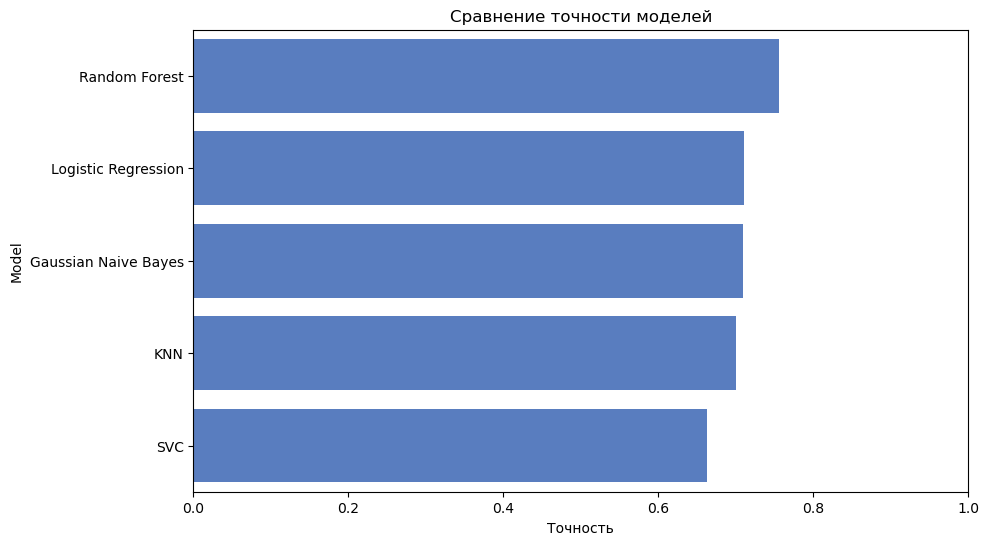

In [421]:
# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(x='accuracy', y='Model', data=log_df.sort_values(by='accuracy', ascending=False), color="b")

# Настраиваем график
plt.xlabel('Точность')
plt.title('Сравнение точности моделей')
plt.xlim(0, 1)  # Устанавливаем пределы по оси X от 0 до 1
plt.show()

## Вывод о наилучшей модели для прогнозирования пригодности воды

Мы оценили несколько моделей машинного обучения для прогнозирования пригодности воды на основе различных признаков,
таких как pH, жесткость, содержание твердых веществ, хлораминов и других. 
Целевая переменная содержала два класса: `0` (непригодная вода для питья) и `1` (пригодная вода).

### Признаки, использованные для построения модели

Список признаков:
- **pH**
- **Жесткость (Hardness)**
- **Содержание твердых веществ (Solids)**
- **Хлорамины (Chloramines)**
- **Сульфаты (Sulfate)**
- **Электропроводность (Conductivity)**
- **Органический углерод (Organic_carbon)**
- **Тригалометаны (Trihalomethanes)**
- **Мутность (Turbidity)**

### Результаты моделей

| Модель                | Accuracy | Precision | Recall   | F1-Score | Support |
|-----------------------|----------|-----------|----------|----------|---------|
| KNN                   | 0.700133 | 0.700228  | 0.700133 | 0.700156 | 1504    |
| SVC                   | 0.662899 | 0.663603  | 0.662899 | 0.662849 | 1504    |
| Random Forest         | 0.755984 | 0.756477  | 0.755984 | 0.755987 | 1504    |
| Gaussian Naive Bayes  | 0.708777 | 0.708950  | 0.708777 | 0.708802 | 1504    |
| Logistic Regression    | 0.710771 | 0.711236  | 0.710771 | 0.710775 | 1504    |

### Анализ результатов

Из таблицы видно, что наилучшие результаты по всем метрикам (accuracy, precision, recall и F1-score) продемонстрировала модель **Random Forest** с точностью **75.60%** и F1-score **75.60%**. 
Эта модель показала высокую устойчивость и эффективность в классификации классов пригодности воды.

Следующей по эффективности является модель **Gaussian Naive Bayes**, 
которая также показала хорошие результаты с точностью **70.88%**.

Модель **Logistic Regression** продемонстрировала результаты, 
схожие с Gaussian Naive Bayes, с точностью около **71%**.

Модель **KNN** показала точность **70%**, что делает ее приемлемым вариантом,
но не столь эффективным, как Random Forest.

Наименее эффективной моделью оказалась **SVC**, которая показала наименьшую точность **66.29%**, что указывает на ее недостаточную способность к обобщению на данном наборе данных.

### Рекомендации

На основании проведенного анализа можно использовать модель **Random Forest** для прогнозирования пригодности воды в данном датасете, так как она обеспечивает наилучшие результаты по всем ключевым метрикам производительности.